In [ ]:
!pip3 install torch torchvision

In [ ]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import ToPILImage
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F
from torchvision import transforms
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
fashion_mnist = torchvision.datasets.FashionMNIST('/.', download=True, transform=transforms.ToTensor())

mnist = torchvision.datasets.MNIST('/.', download=True, transform=transforms.ToTensor())

In [ ]:
class Net(nn.Module):
    def __init__(self, out=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc2 = nn.Linear(64, out)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 4)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 4)
        x = torch.flatten(x, 1)
        x = self.fc2(x)
        output = F.softmax(x, dim=1)
        return output

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch % 10 == 0:
            print(f'epoch: {epoch}, loss: {loss.item()}')
            

def test(model, device, test_loader):
    model.eval()
    correct = 0
    i = 0
    for batch, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        i += target.shape[0]

    print(f'Accuracy: {100 * correct / i}%')

In [ ]:
def run_train(model, train_loader, test_loader, epochs, file=None):
    torch.manual_seed(4)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
    if file is not None:
        torch.save(model.state_dict(), file)

In [ ]:
def plot_conf_matrix(y_true, y_pred):
    cf = confusion_matrix(y_true.view_as(y_pred), y_pred)
    ConfusionMatrixDisplay(cf).plot()
    plt.title(f'Accuracy: {100. * accuracy_score(y_true, y_pred)}%')
    plt.show()


def plot_classes(best_data):
    fig = plt.figure(figsize=(32, 32))
    columns = 10
    rows = 10
    for i in range(0, rows):
        for j in range(0, columns):
            img = best_data[i][j]
            fig.add_subplot(rows, columns, i * columns + j + 1)
            plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
val_split = .2
batch_size = 32

mnist_indices = list(range(len(mnist)))
split = int(np.floor(val_split * len(mnist_indices)))
np.random.shuffle(mnist_indices)


train_indices, val_indices = mnist_indices[split:], mnist_indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(mnist, batch_size=batch_size,
                                         sampler=val_sampler)

In [ ]:
epochs = 10
net = Net(10)
net.to(device)

run_train(net, train_loader, val_loader, epochs)


epoch: 1, loss: 2.305858612060547
epoch: 1, loss: 2.2897002696990967
epoch: 1, loss: 2.291264057159424
epoch: 1, loss: 2.2808451652526855
epoch: 1, loss: 2.301887035369873
epoch: 1, loss: 2.287982225418091
epoch: 1, loss: 2.2795538902282715
epoch: 1, loss: 2.2385945320129395
epoch: 1, loss: 2.2460174560546875
epoch: 1, loss: 2.1326675415039062
epoch: 1, loss: 2.1170742511749268
epoch: 1, loss: 2.00407338142395
epoch: 1, loss: 1.9734987020492554
epoch: 1, loss: 2.005366325378418
epoch: 1, loss: 2.0034914016723633
epoch: 1, loss: 1.8208584785461426
epoch: 1, loss: 1.8432927131652832
epoch: 1, loss: 1.9907608032226562
epoch: 1, loss: 1.9641178846359253
epoch: 1, loss: 1.8582764863967896
epoch: 1, loss: 1.894249439239502
epoch: 1, loss: 1.8939344882965088
epoch: 1, loss: 1.9090867042541504
epoch: 1, loss: 1.7916678190231323
epoch: 1, loss: 1.8898181915283203
epoch: 1, loss: 1.9057435989379883
epoch: 1, loss: 1.7062690258026123
epoch: 1, loss: 1.8072785139083862
epoch: 1, loss: 1.7190871238

In [ ]:
val_split = .2
batch_size = 32

fmnist_indices = list(range(len(fashion_mnist)))
split = int(np.floor(val_split * len(fmnist_indices)))
np.random.shuffle(mnist_indices)


train_indices, val_indices = fmnist_indices[split:], fmnist_indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=batch_size,
                                         sampler=val_sampler)

In [ ]:
epochs = 10
net = Net(10)
net.to(device)

run_train(net, train_loader, val_loader, epochs)

epoch: 1, loss: 2.305098295211792
epoch: 1, loss: 2.295976400375366
epoch: 1, loss: 2.290945529937744
epoch: 1, loss: 2.2656140327453613
epoch: 1, loss: 2.2484183311462402
epoch: 1, loss: 2.244823932647705
epoch: 1, loss: 2.1597392559051514
epoch: 1, loss: 2.1309101581573486
epoch: 1, loss: 2.115382194519043
epoch: 1, loss: 2.018503189086914
epoch: 1, loss: 2.0638480186462402
epoch: 1, loss: 2.006195545196533
epoch: 1, loss: 2.006742000579834
epoch: 1, loss: 1.9654977321624756
epoch: 1, loss: 2.006840467453003
epoch: 1, loss: 1.944234848022461
epoch: 1, loss: 1.9306997060775757
epoch: 1, loss: 1.8103392124176025
epoch: 1, loss: 1.9219818115234375
epoch: 1, loss: 1.8037570714950562
epoch: 1, loss: 1.7242732048034668
epoch: 1, loss: 1.8416017293930054
epoch: 1, loss: 1.7668545246124268
epoch: 1, loss: 1.8458333015441895
epoch: 1, loss: 1.8131680488586426
epoch: 1, loss: 1.828282356262207
epoch: 1, loss: 1.7559723854064941
epoch: 1, loss: 1.8094455003738403
epoch: 1, loss: 1.7449355125427

In [ ]:
net.eval()

all_preds = None
all_trues = None
best_score = np.full(shape=(len(val_loader), len(val_loader)), fill_value=-1e20)
best_data = []
for i in range(0, len(val_loader)):
  best_data.append([None] * len(val_loader))

    
with torch.no_grad():
  for batch, (data_cpu, target_cpu) in enumerate(val_loader):
    data, target = data_cpu.to(device), target_cpu.to(device)
    output = net(data)
    for x, preds in enumerate(output):
      for y_pred, conf in enumerate(preds):
        score = conf.item()
        y_true = target_cpu.numpy()[x]
        if best_score[y_true][y_pred] < score:
          best_score[y_true][y_pred] = score
          best_data[y_true][y_pred] = data_cpu.numpy()[x][0]
    y_pred = output.argmax(dim=1, keepdim=True)
    y_true = target.view_as(y_pred)
    if all_preds is None:
      all_preds = y_pred.flatten()
      all_trues = y_true.flatten()
    else:
      all_preds = torch.cat((all_preds, y_pred.flatten()))
      all_trues = torch.cat((all_trues, y_true.flatten()))

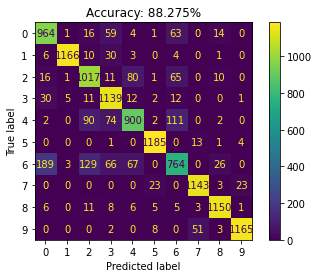

In [ ]:
plot_conf_matrix(all_trues.cpu(), all_preds.cpu())

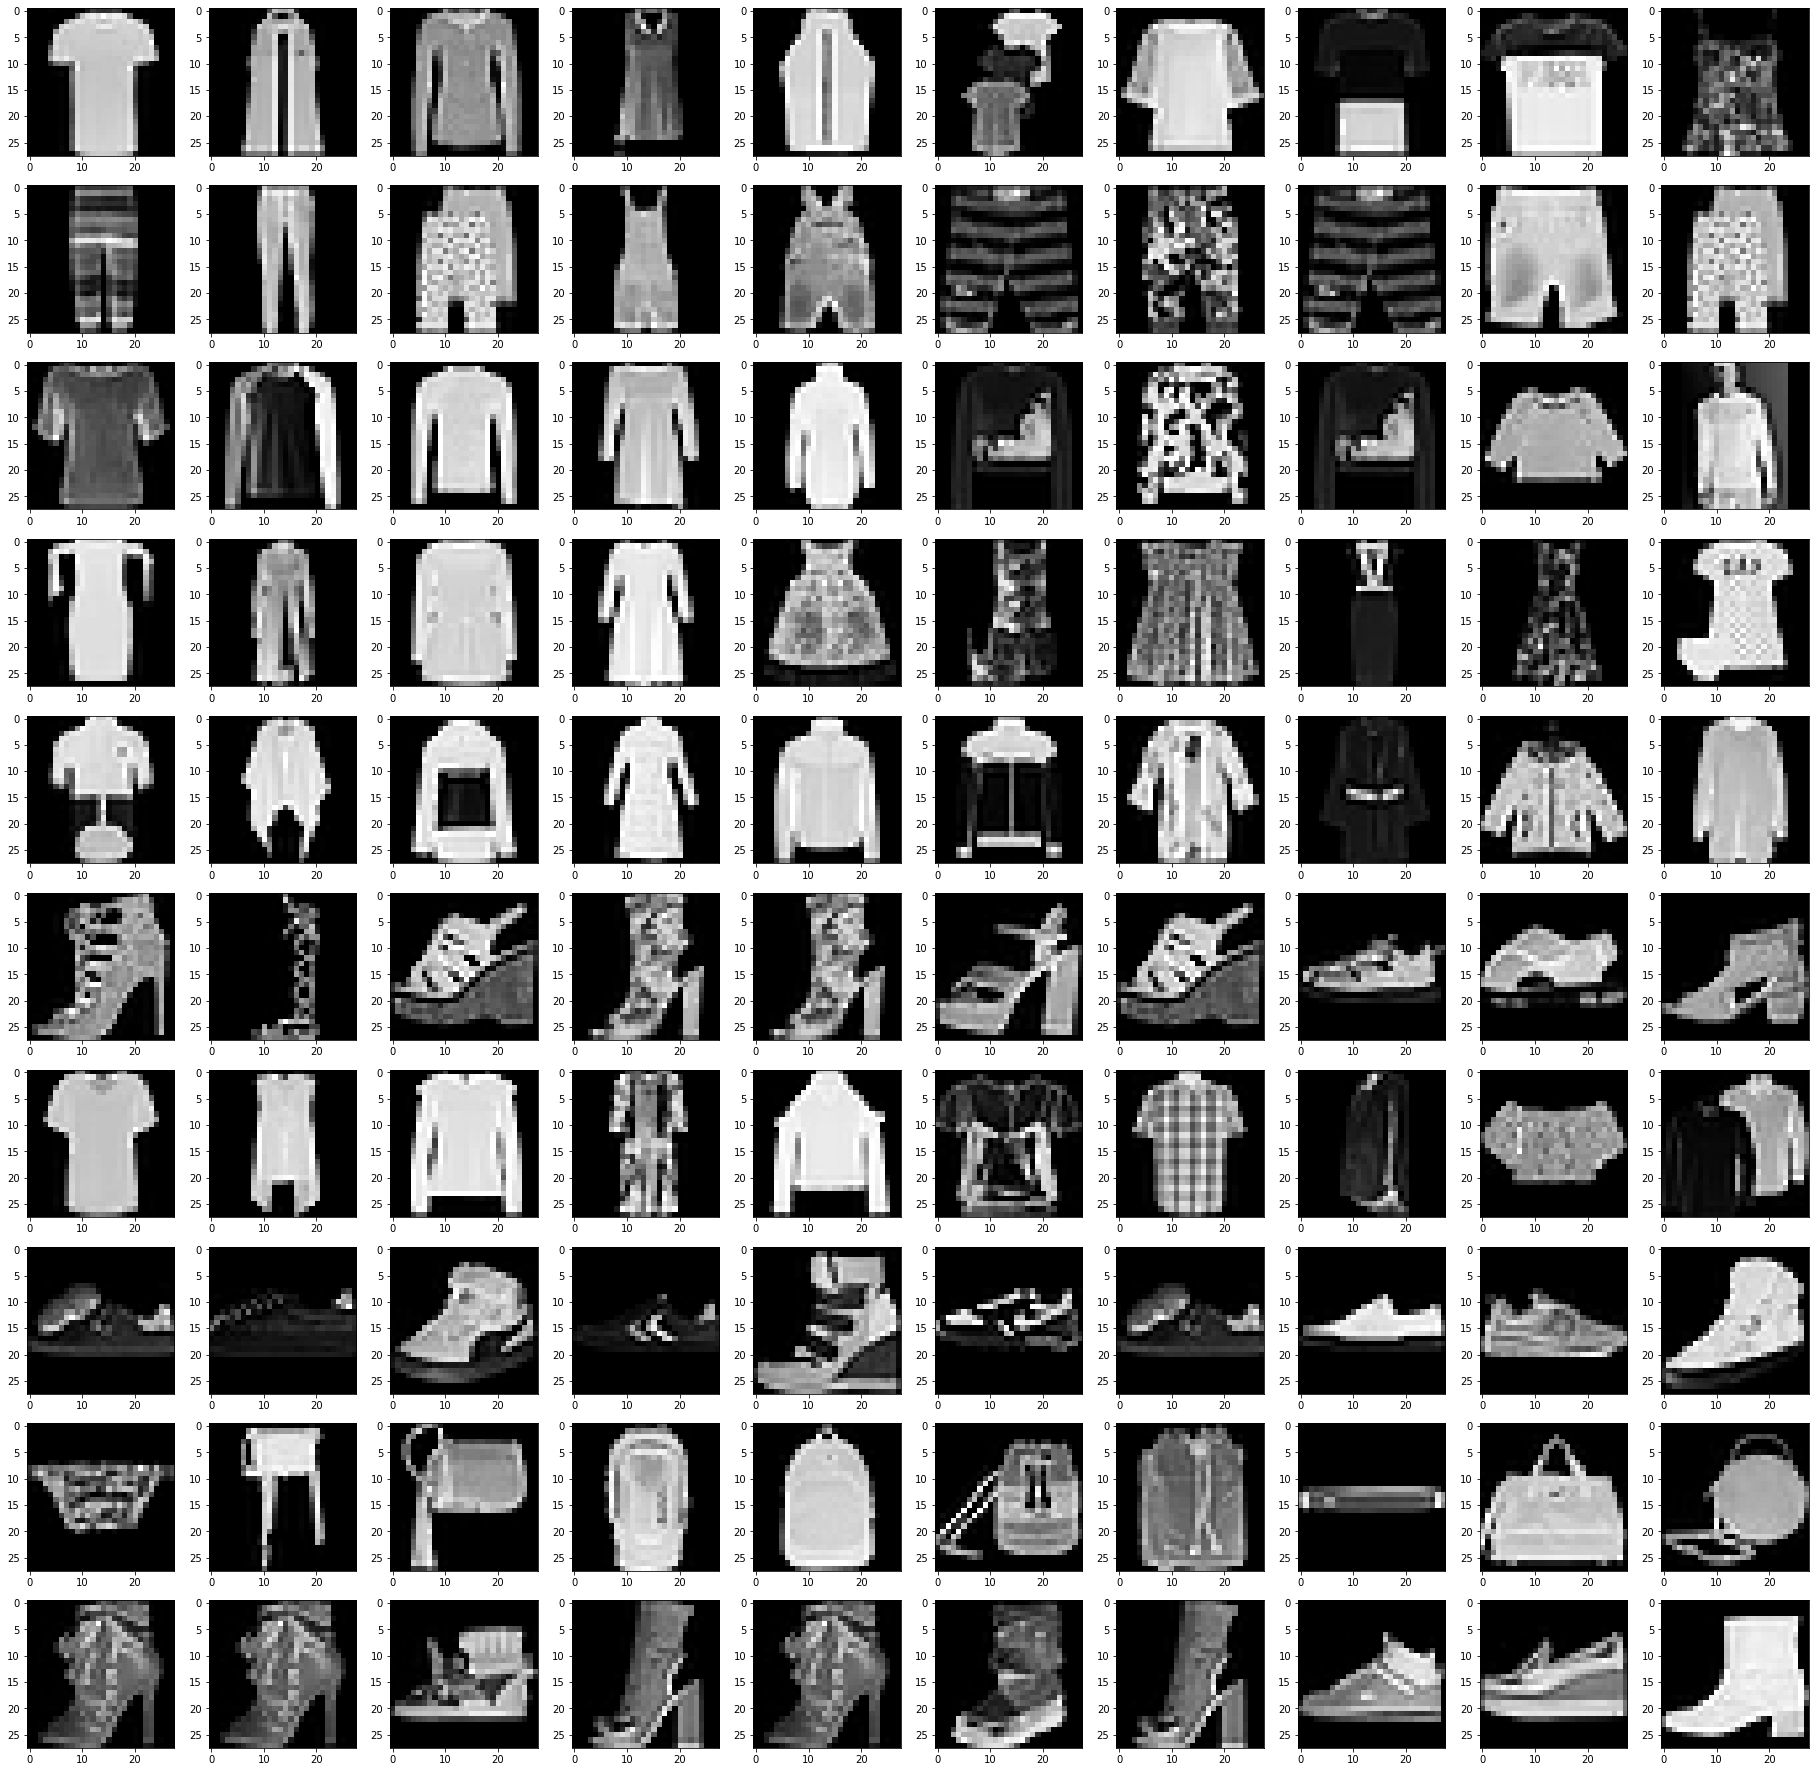

In [ ]:
plot_classes(best_data)